/tmp/ipython-input-328203889.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


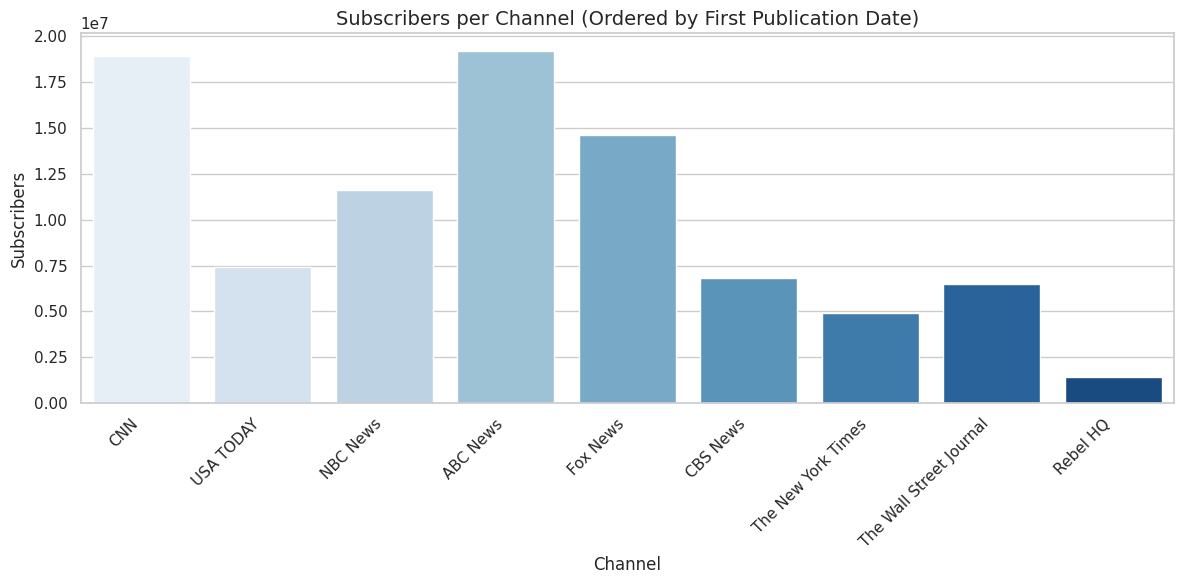

In [13]:
from datetime import datetime
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load the data
# -----------------------------
df = pd.read_csv("news_channel_stats.csv")

sns.set(style="whitegrid")

# Ensure 'published_at' is a datetime type
df['published_at'] = pd.to_datetime(df['published_at'])

# Sort the dataframe by publication date
df_sorted = df.sort_values('published_at')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_sorted,
    x='channel_name',
    y='subscribers',
    palette='Blues'
)

plt.title("Subscribers per Channel (Ordered by First Publication Date)", fontsize=14)
plt.xlabel("Channel")
plt.ylabel("Subscribers")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3926256978.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


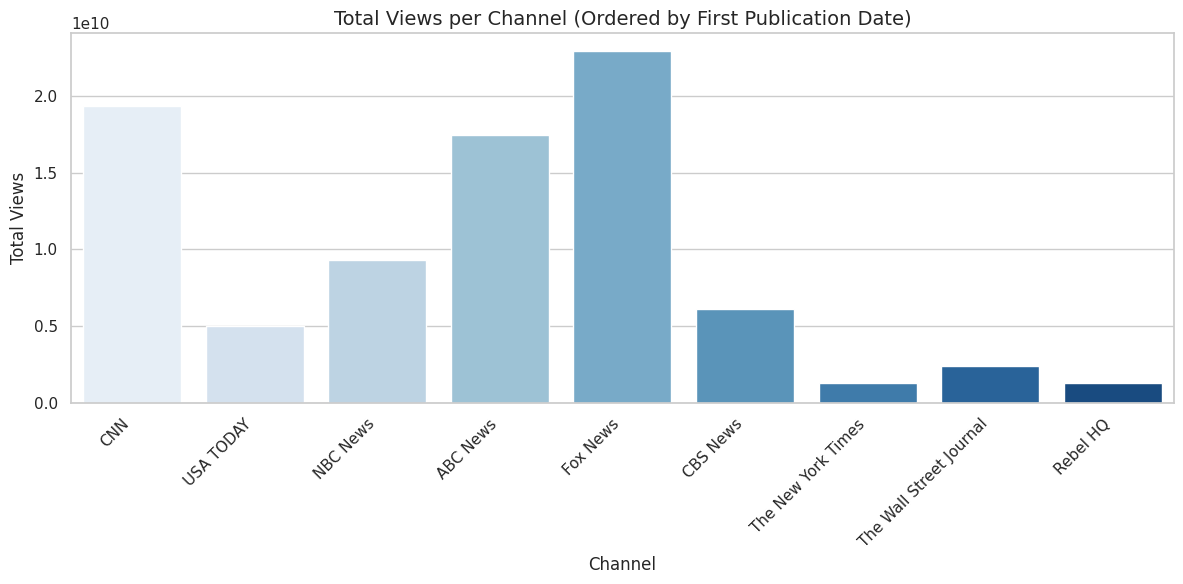

In [25]:
sns.set(style="whitegrid")

# Ensure 'published_at' is datetime
df['published_at'] = pd.to_datetime(df['published_at'])

# Get the *first* publication date per channel
first_pub = df.groupby('channel_name')['published_at'].min().reset_index()
first_pub = first_pub.sort_values('published_at')

# Aggregate total views per channel
views_per_channel = df.groupby('channel_name')['total_views'].sum().reset_index()

# Merge so both have the same order
merged = first_pub.merge(views_per_channel, on='channel_name')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=merged,
    x='channel_name',
    y='total_views',
    palette='Blues'
)

plt.title("Total Views per Channel (Ordered by First Publication Date)", fontsize=14)
plt.xlabel("Channel")
plt.ylabel("Total Views")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

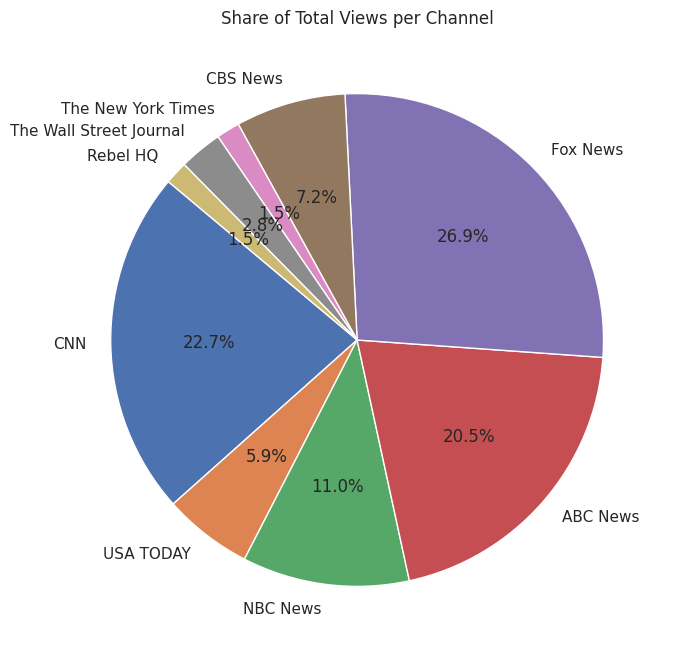

In [29]:
plt.figure(figsize=(8, 8))
plt.pie(
    merged['total_views'],
    labels=merged['channel_name'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Share of Total Views per Channel")
plt.show()

/tmp/ipython-input-3187528033.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3187528033.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3187528033.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3187528033.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


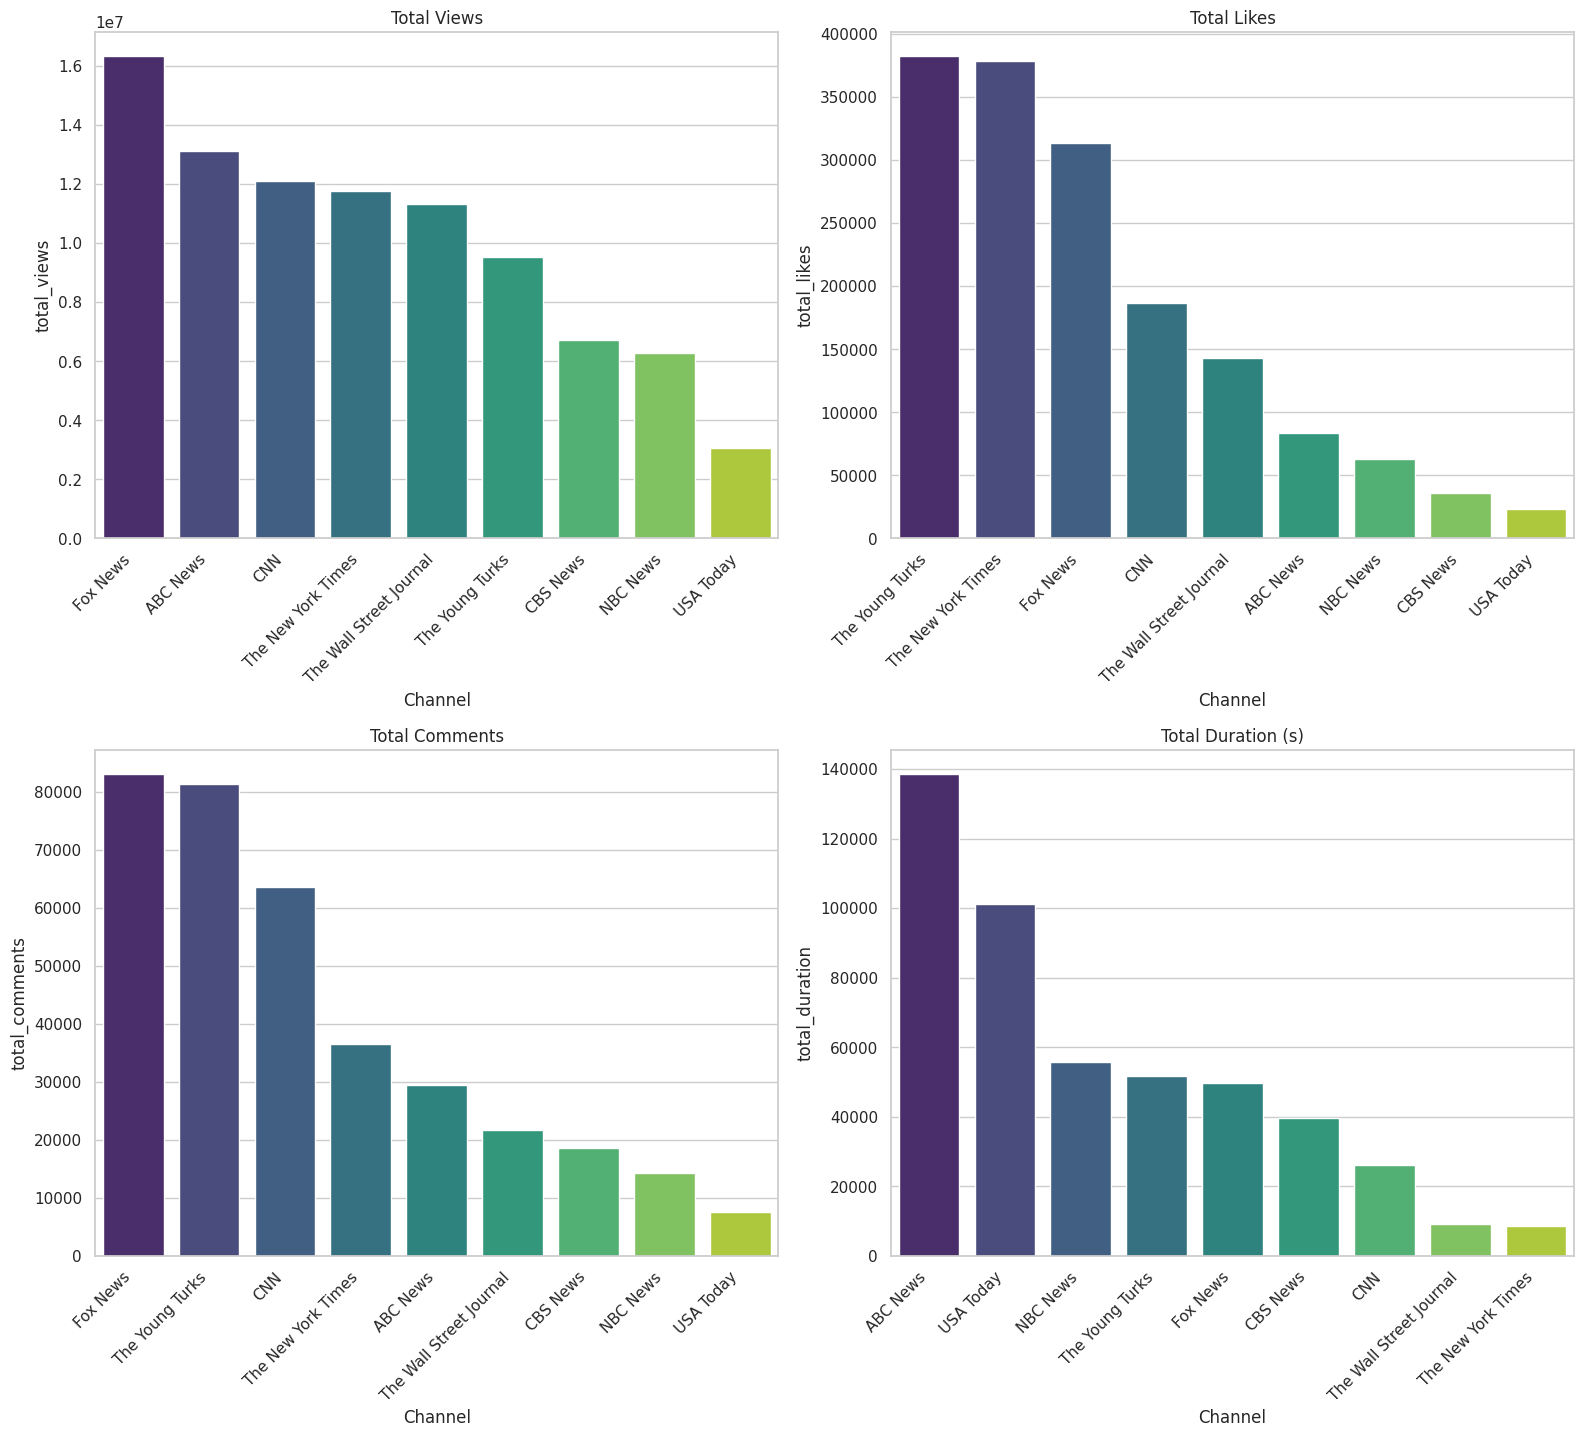

In [20]:
# -----------------------------
# 1. Load the data
# -----------------------------
october_df = pd.read_csv("october_videos.csv")

# Conversion function
def iso8601_to_seconds(duration):
    hours = minutes = seconds = 0
    if pd.isna(duration):
        return 0
    match_hours = re.search(r'(\d+)H', duration)
    if match_hours:
        hours = int(match_hours.group(1))
    match_minutes = re.search(r'(\d+)M', duration)
    if match_minutes:
        minutes = int(match_minutes.group(1))
    match_seconds = re.search(r'(\d+)S', duration)
    if match_seconds:
        seconds = int(match_seconds.group(1))
    return hours * 3600 + minutes * 60 + seconds

# Correctly apply to the existing column 'Duration'
october_df['duration_seconds'] = october_df['Duration'].apply(iso8601_to_seconds)

# Group by Channel and sum the metrics
october_summary = october_df.groupby('Channel').agg(
    total_views=('Views', 'sum'),
    total_likes=('Likes', 'sum'),
    total_comments=('Comments', 'sum'),
    total_duration=('duration_seconds', 'sum')       # 'duration' in seconds or minutes
).reset_index()

sns.set(style="whitegrid")

# Metrics and titles
metrics = ['total_views', 'total_likes', 'total_comments', 'total_duration']
titles = ['Total Views', 'Total Likes', 'Total Comments', 'Total Duration (s)']

plt.figure(figsize=(16, 20))

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns
    sns.barplot(
        data=october_summary.sort_values(metric, ascending=False),
        x='Channel',
        y=metric,
        palette='viridis'
    )
    plt.title(titles[i-1])
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()